In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_fp = pd.read_csv("data/fp_data.csv", index_col=0)
df_gk = pd.read_csv("data/gk_data.csv", index_col=0)
pd.set_option('display.max_columns', None)

In [3]:
# show numbers with 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
df_fp.head()

,market_value_€,player_name,long_name,year_of_birth,player_age,height_cm,weight_kg,nationality,main_position,all_positions,club,league,divison,national_team_current_or_past,national_team_country,current_national_player,no_current_national_player,national_team_appearances,international_reputation,overall,potential,preferred_foot,weak_foot,skill_moves,work_rate,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,112000000.000,Lionel Messi,Lionel Andrés Messi Cuccittini,1987,32,170,72,Argentina,Rechtsaußen,"RW, CF, ST",FC Barcelona,LaLiga,1,1,Argentinien,1,0,138,5,94,94,Left,4,4,Medium/Low,87,92,92,96,39,66,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63
1,60000000.000,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985,35,187,83,Portugal,Linksaußen,"ST, LW",Juventus Turin,Serie A,1,1,Portugal,1,0,164,5,93,93,Right,4,5,High/Low,90,93,82,89,35,78,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61
2,128000000.000,Neymar,Neymar da Silva Santos Junior,1992,28,175,68,Brazil,Linksaußen,"LW, CAM",FC Paris Saint-Germain,Ligue 1,1,1,Brasilien,1,0,102,5,92,92,Right,5,5,High/Medium,91,85,87,95,32,58,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61
3,80000000.000,Eden Hazard,Eden Hazard,1991,28,175,74,Belgium,Linksaußen,"LW, CF",Real Madrid,LaLiga,1,1,Belgien,1,0,106,4,91,91,Right,4,4,High/Medium,91,83,86,94,35,66,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,83,83,83,89,88,88,88,89,89,89,89,89,83,83,83,89,66,63,63,63,66,61,49,49,49,61
4,120000000.000,Kevin De Bruyne,Kevin De Bruyne,1991,28,181,70,Belgium,Offensives Mittelfeld,"CAM, CM",Manchester City,Premier League,1,1,Belgien,1,0,74,4,91,91,Right,5,4,High/High,76,86,92,86,61,78,"Power Free-Kick, Avoids Using Weaker Foot, Div...",93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73


In [5]:
def plot_hist(df, feature, title):
    
    feature_mean = round(df[f"{feature}"].mean()).astype("int64")

    plt.figure(figsize=(15,5))

    ax = sns.distplot(df[f"{feature}"], kde=True, bins = 20,
                     kde_kws={"color": "k", "lw": 1, "label": "KDE"})

    plt.ticklabel_format(style='plain', axis='x')
    ax.tick_params(labelsize=14)
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    plt.axvline(feature_mean, color='b', linestyle='dashed', linewidth=2, ymax=0.95, label="Mean")

    ax.set_ylabel("count", fontsize = 16)
    ax.set_xlabel(f"{feature}", fontsize = 16)
    ax.set_title(f"{title}",fontsize = 20)
    
    ### text box, for fast visualisation of key values
    
    # defining key values for texr box
    min_value = round(df[f"{feature}"].min()).astype("int64")
    max_value = round(df[f"{feature}"].max()).astype("int64")
    mean_value = round(df[f"{feature}"].mean()).astype("int64")
    
    # put key values in joined text-string
    textstr = '\n'.join((
        f"min value = {min_value:0,}",
        f"max value = {max_value:0,}",
        f"mean value = {mean_value:0,}"))
    
    # define box style
    props = dict(boxstyle='round', facecolor='blue', alpha=0.2)

    # place text box on the right with x and y coordinates
    ax.text(0.75, 0.6, textstr, transform=ax.transAxes, fontsize=15,
        verticalalignment='center', bbox=props)

    
    if feature == "market_value_€":
        
        import matplotlib.ticker as plticker
        
        plt.xticks(rotation='vertical')

        #set tick every 10 Mio €
        tick_spacing = 10000000
        loc = plticker.MultipleLocator(tick_spacing)
        ax.xaxis.set_major_locator(loc)
        
        plt.legend(prop={'size': 15})
        plt.show();
    
    else:
        plt.legend(prop={'size': 15})
        plt.show();

# Target variable

### Field Players

In [6]:
df_fp["market_value_€"].describe()

count       10979.000
mean      2907293.469
std       8017991.462
min         25000.000
25%        325000.000
50%        625000.000
75%       1800000.000
max     180000000.000
Name: market_value_€, dtype: float64

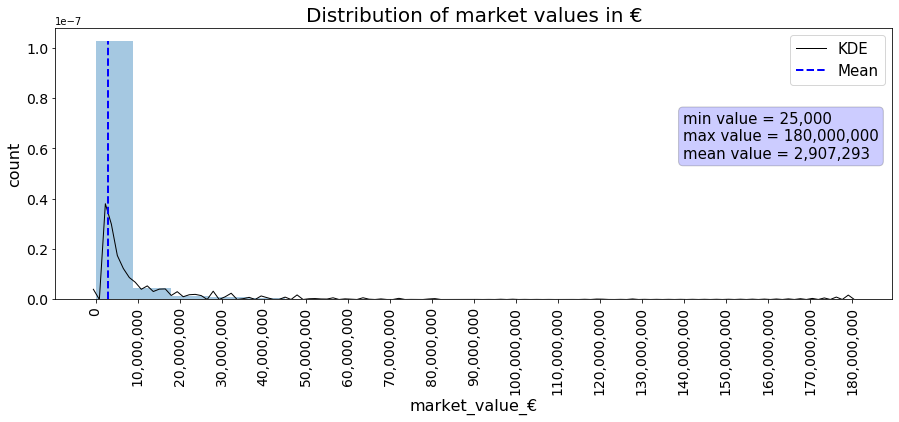

In [7]:
plot_hist (df_fp, "market_value_€", "Distribution of market values in €")

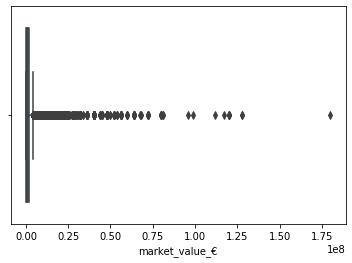

In [8]:
sns.boxplot(df_fp["market_value_€"]);

In [9]:
def detect_outlier(df, feature):
    
    outliers=[]
    # standard threshold is 3
    threshold=3
    mean = df[f"{feature}"].mean()
    std = df[f"{feature}"].std()
    
    
    for i in df[f"{feature}"]:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    print (len(outliers))
    print (sorted(outliers, reverse=True))
    print ("----------------------------------------------------")
    print ("----------------------------------------------------")
    print ("----------------------------------------------------")
    print ("Truncate dataframe at:")
    return min(outliers)

In [10]:
detect_outlier (df_fp, "market_value_€")

232
[180000000.0, 128000000.0, 128000000.0, 120000000.0, 120000000.0, 120000000.0, 120000000.0, 117000000.0, 112000000.0, 99000000.0, 96000000.0, 81000000.0, 81000000.0, 80000000.0, 80000000.0, 80000000.0, 80000000.0, 80000000.0, 80000000.0, 72000000.0, 72000000.0, 72000000.0, 72000000.0, 72000000.0, 72000000.0, 68000000.0, 68000000.0, 67500000.0, 64000000.0, 64000000.0, 64000000.0, 64000000.0, 64000000.0, 64000000.0, 64000000.0, 64000000.0, 64000000.0, 64000000.0, 64000000.0, 60000000.0, 60000000.0, 60000000.0, 60000000.0, 56000000.0, 56000000.0, 56000000.0, 56000000.0, 56000000.0, 56000000.0, 56000000.0, 56000000.0, 56000000.0, 56000000.0, 56000000.0, 54000000.0, 54000000.0, 54000000.0, 52000000.0, 52000000.0, 52000000.0, 52000000.0, 52000000.0, 52000000.0, 52000000.0, 52000000.0, 49500000.0, 49500000.0, 48000000.0, 48000000.0, 48000000.0, 48000000.0, 48000000.0, 48000000.0, 48000000.0, 48000000.0, 48000000.0, 48000000.0, 48000000.0, 48000000.0, 48000000.0, 48000000.0, 48000000.0, 48

27000000.0

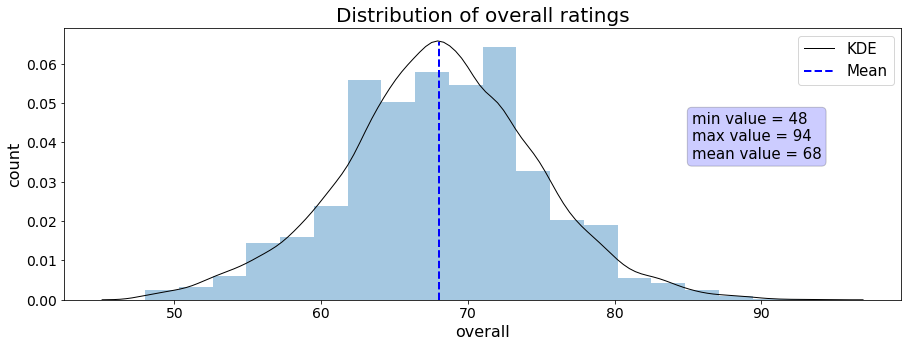

In [22]:
plot_hist (df_fp, "overall", "Distribution of overall ratings")

### Goalkeepers

In [11]:
df_gk["market_value_€"].describe()

count       1406.000
mean     1481909.673
std      5211826.791
min        25000.000
25%       150000.000
50%       325000.000
75%       800000.000
max     80000000.000
Name: market_value_€, dtype: float64

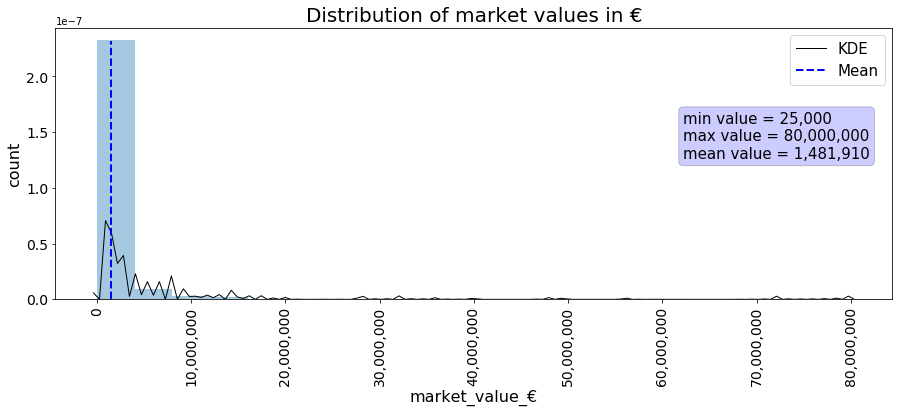

In [12]:
plot_hist (df_gk, "market_value_€", "Distribution of market values in €")

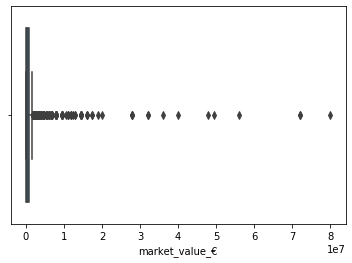

In [13]:
sns.boxplot(df_gk["market_value_€"]);

In [14]:
detect_outlier (df_gk, "market_value_€")

17
[80000000.0, 72000000.0, 72000000.0, 56000000.0, 49500000.0, 48000000.0, 40000000.0, 36000000.0, 32000000.0, 32000000.0, 28000000.0, 28000000.0, 28000000.0, 20000000.0, 19000000.0, 17500000.0, 17500000.0]
----------------------------------------------------
----------------------------------------------------
----------------------------------------------------
Truncate dataframe at:


17500000.0

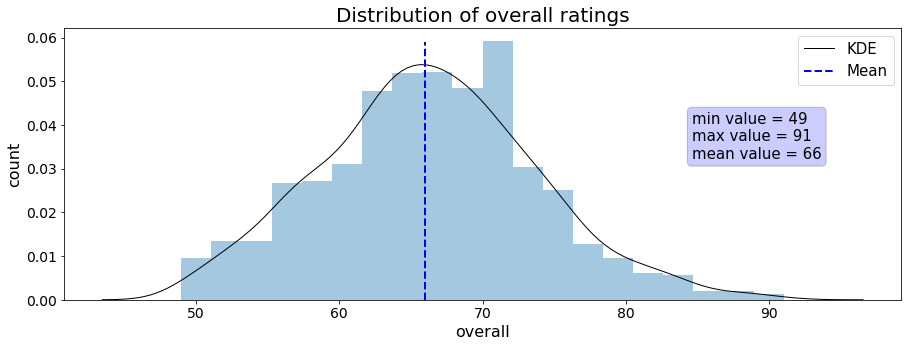

In [21]:
plot_hist (df_gk, "overall", "Distribution of overall ratings")

# Numerical data

Investigation for fieldplayers stands representative for goalkeepers

#### Explore relationship between overall rating and aggregated ratings

In [48]:
comp_data1 = df_fp[["overall","pace","shooting","passing","dribbling","defending","physic"]]

In [40]:
def plot_pair (data):
    sns.pairplot(data, corner=True, diag_kind="kde", kind="reg", plot_kws={'line_kws':{'color':'black'}}, markers="+")

In [102]:
def plot_heatmap (data):
    
    corrmat = data.corr()
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(16, 10))
        ax.xaxis.tick_top() 
        cmap = sns.color_palette("RdBu_r", 10)
        matrix = np.tril(corrmat)
        
    if len(data.columns) < 15:
    
        sns.set(context="paper", font="monospace", font_scale=2)

        with sns.axes_style("white"):
            heatmap = sns.heatmap(corrmat, cmap=cmap, vmin=-1, vmax=1, center= 0, square=True, annot=True, 
                                  annot_kws={"size": 12}, fmt='.1g', mask=matrix, linewidths=1, rasterized=True);
    
    elif len(data.columns) <= 30:
        
        sns.set(context="paper", font="monospace", font_scale=1.5)
        
        with sns.axes_style("white"):
            heatmap = sns.heatmap(corrmat, cmap=cmap, vmin=-1, vmax=1, center= 0, square=True, annot=True, 
                                  annot_kws={"size": 10}, fmt='.1g', mask=matrix, linewidths=1, rasterized=True);
    
    else:
        
        sns.set(context="paper", font="monospace", font_scale=1)

        with sns.axes_style("white"):
            heatmap = sns.heatmap(corrmat, cmap=cmap, vmin=-1, vmax=1, center= 0, square=True, annot=True, 
                                  annot_kws={"size": 8}, fmt='.1g', mask=matrix, linewidths=1, rasterized=True);


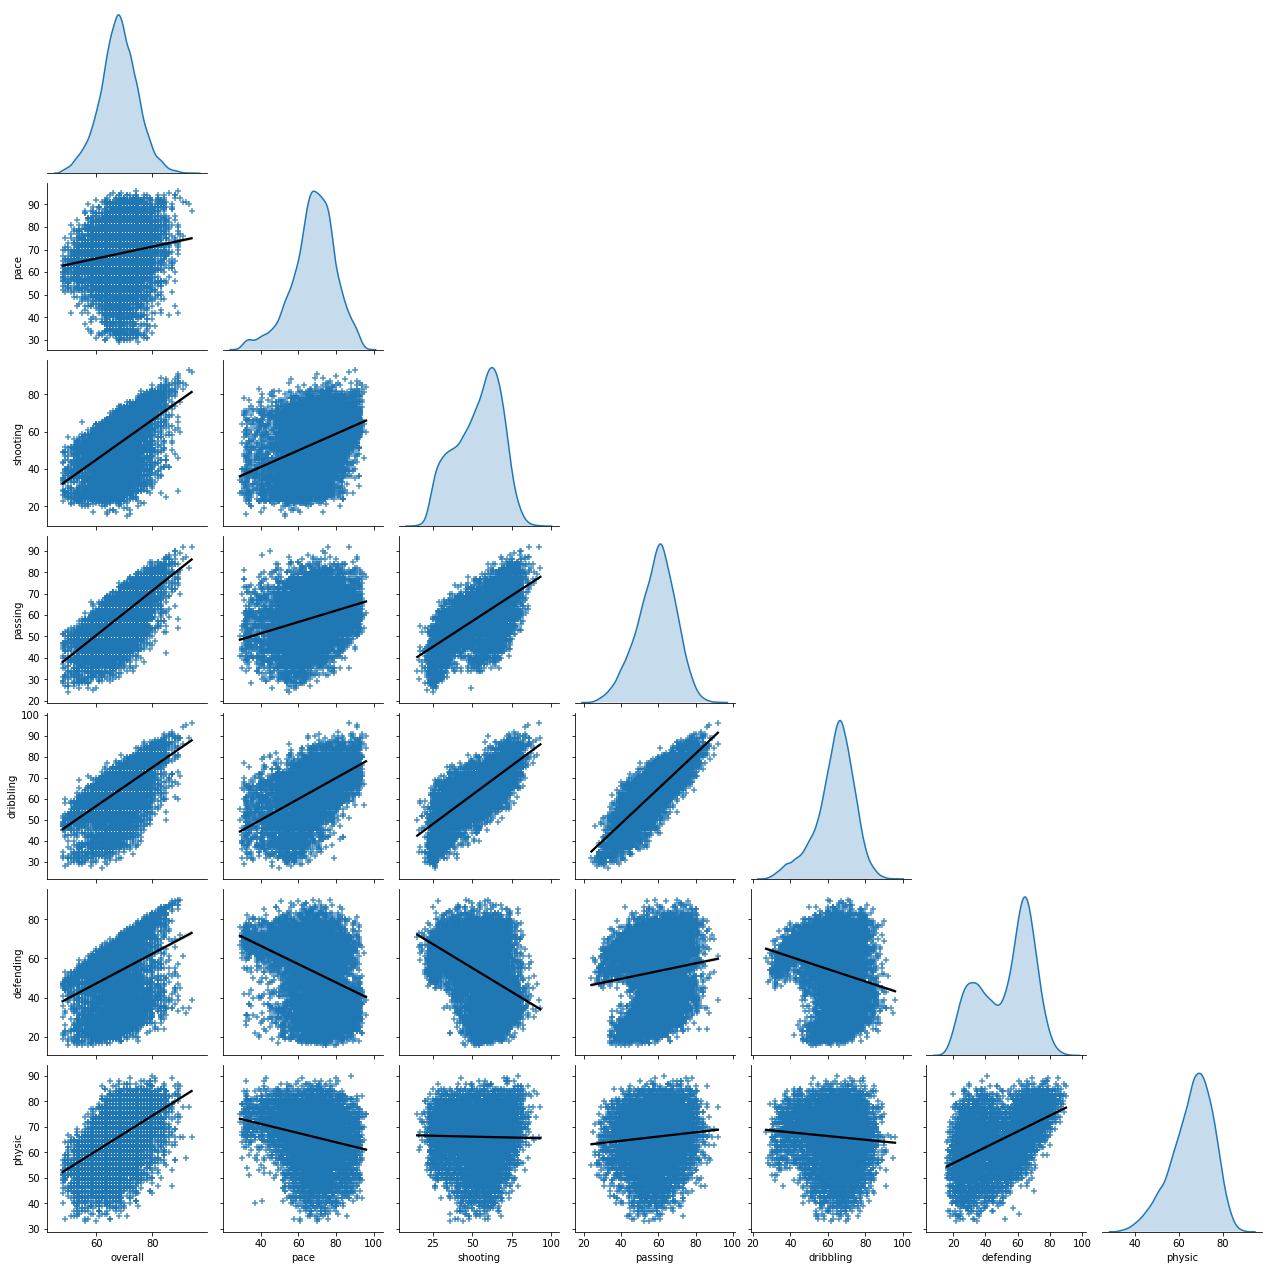

In [41]:
plot_pair(comp_data1)

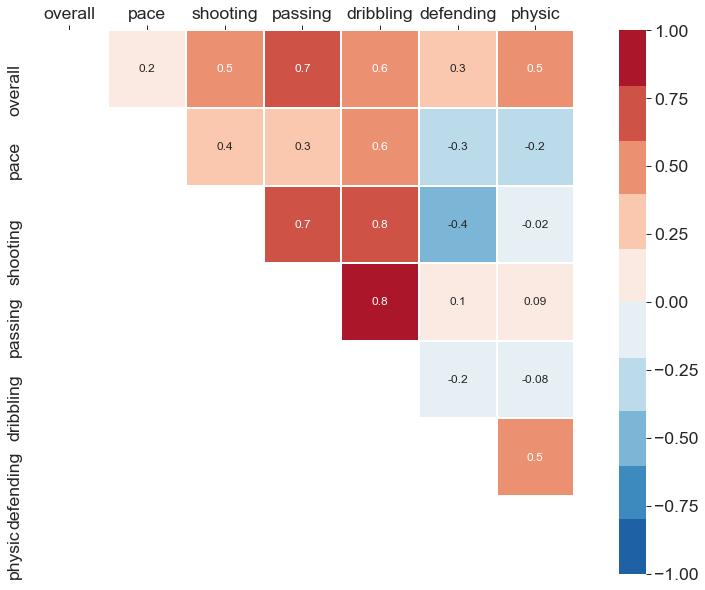

In [103]:
plot_heatmap(comp_data1)

#### Explore relationship between overall rating and individual attributes

In [44]:
comp_data2 = df_fp[["overall","attacking_crossing","attacking_finishing","attacking_heading_accuracy",
                    "attacking_short_passing","attacking_volleys","skill_dribbling","skill_curve","skill_fk_accuracy",
                    "skill_long_passing","skill_ball_control","movement_acceleration","movement_sprint_speed",
                    "movement_agility","movement_reactions","movement_balance","power_shot_power","power_jumping",
                    "power_stamina","power_strength","power_long_shots","mentality_aggression","mentality_interceptions",
                    "mentality_positioning","mentality_vision","mentality_penalties","mentality_composure",
                    "defending_marking","defending_standing_tackle","defending_sliding_tackle"]]

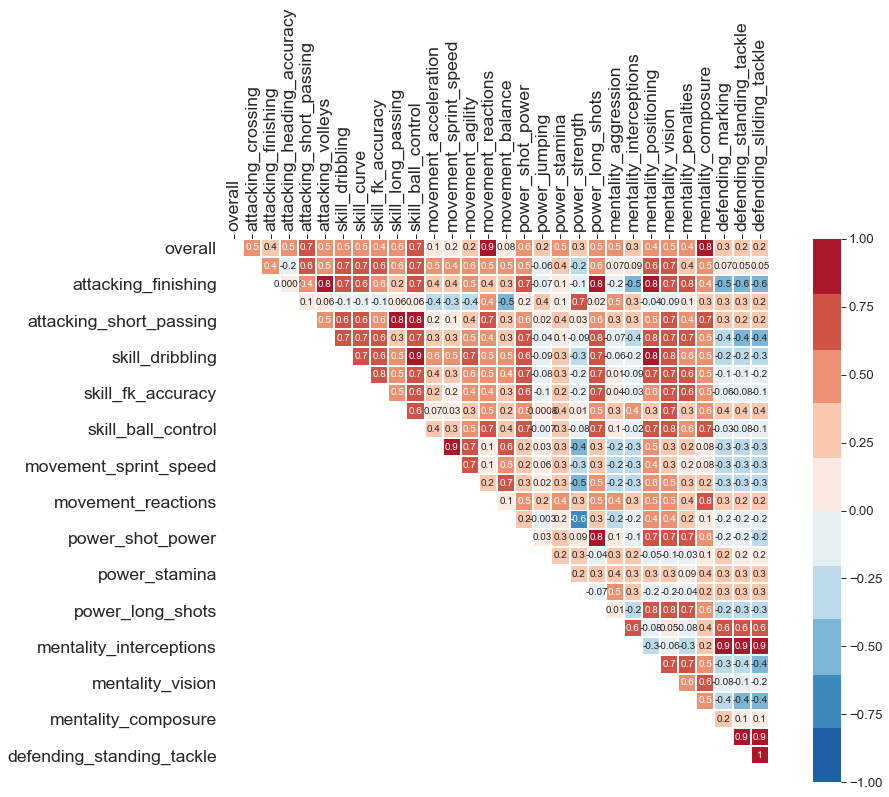

In [104]:
plot_heatmap(comp_data2)

In [66]:
#### Explore relationship between aggregated ratings and individual attributes

In [65]:
comp_data3 = df_fp[["pace","shooting","passing","dribbling","defending","physic","attacking_crossing",
                    "attacking_finishing","attacking_heading_accuracy",
                    "attacking_short_passing","attacking_volleys","skill_dribbling","skill_curve","skill_fk_accuracy",
                    "skill_long_passing","skill_ball_control","movement_acceleration","movement_sprint_speed",
                    "movement_agility","movement_reactions","movement_balance","power_shot_power","power_jumping",
                    "power_stamina","power_strength","power_long_shots","mentality_aggression","mentality_interceptions",
                    "mentality_positioning","mentality_vision","mentality_penalties","mentality_composure",
                    "defending_marking","defending_standing_tackle","defending_sliding_tackle"]]

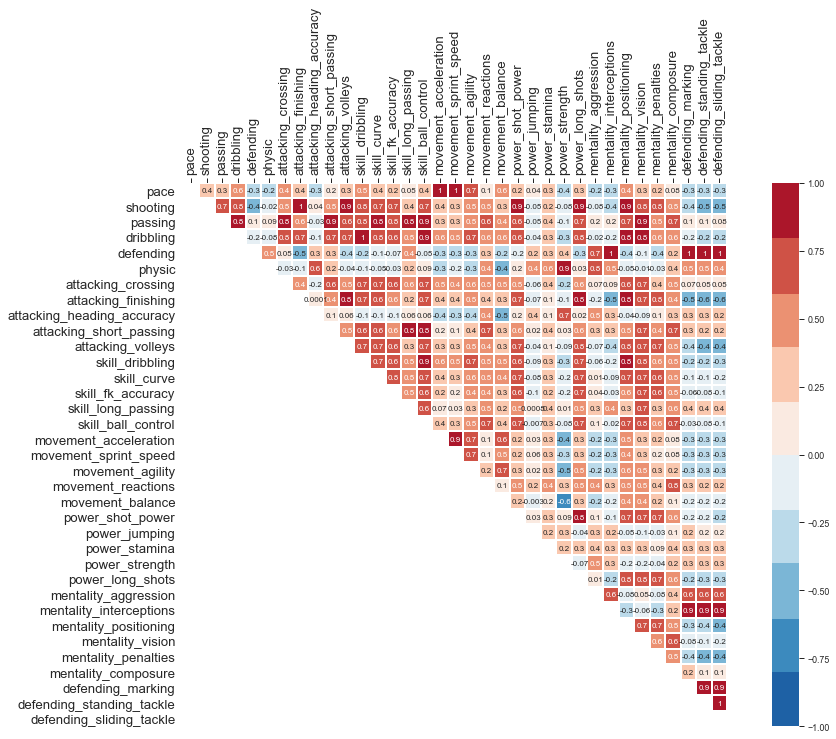

In [105]:
plot_heatmap(comp_data3)

# Categorical Data

In [15]:
df_fp.head(1)

,market_value_€,player_name,long_name,year_of_birth,player_age,height_cm,weight_kg,nationality,main_position,all_positions,club,league,divison,national_team_current_or_past,national_team_country,current_national_player,no_current_national_player,national_team_appearances,international_reputation,overall,potential,preferred_foot,weak_foot,skill_moves,work_rate,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,112000000.000,Lionel Messi,Lionel Andrés Messi Cuccittini,1987,32,170,72,Argentina,Rechtsaußen,"RW, CF, ST",FC Barcelona,LaLiga,1,1,Argentinien,1,0,138,5,94,94,Left,4,4,Medium/Low,87,92,92,96,39,66,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63


Categories needed to be investigated upon:
- nationality
- main
- all_positions (doesn't apply for GK)
- club
- league
- national_team_country
- preferred_foot
- work_rate (doesn't apply for GK)
- traits

In [16]:
df_fp_cat = df_fp[["nationality","main_position","all_positions","club","league","national_team_country",
                   "preferred_foot","work_rate","player_traits"]]
df_gk_cat = df_gk[["nationality","main_position","club","league","national_team_country",
                   "preferred_foot","player_traits"]]

In [17]:
def count_cat_uniques(df):
    for i in list(df.columns):
        print ("\033[1m" + i + "\033[0m","got uniques:",df[f"{i}"].nunique())

In [18]:
count_cat_uniques(df_fp_cat)

nationality got uniques: 148
main_position got uniques: 15
all_positions got uniques: 569
club got uniques: 571
league got uniques: 34
national_team_country got uniques: 154
preferred_foot got uniques: 2
work_rate got uniques: 9
player_traits got uniques: 763


In [19]:
count_cat_uniques(df_gk_cat)

nationality got uniques: 82
main_position got uniques: 1
club got uniques: 561
league got uniques: 34
national_team_country got uniques: 89
preferred_foot got uniques: 2
player_traits got uniques: 80


#### thoughts for feature engineering

- aggregate nationality and national teams into continents
- drop club, maybe use for "superstars"
- convert all positions into some sort of "the more positions able to play the more flexible the player is"
- investigate what work rates refer to
- investigate upon player traits and aggregate into broader categories

In [20]:
def plot_count_cat(df, feature):
    sns.set(style="darkgrid")
    
    fig, ax = plt.subplots(figsize=(15,5))
    sns.countplot(x=f"{feature}", alpha=0.7, data=df)
    plt.xticks(rotation=90)
    plt.tight_layout()